# Read data

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [5]:
# Read data
digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples,-1))
y = digits.target
# 
print(len(X))
print(len(y))

1797
1797


## Train Test split to evaluate the performance of model

In [6]:
# Split data into 80% train and 20% test subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [7]:
# Create a classifier: a suport vector classifier
clf = svm.SVC(gamma=0.001)


In [8]:
# Training model by fitting data to model (one step training)
clf.fit(X_train,y_train)


SVC(gamma=0.001)

In [9]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

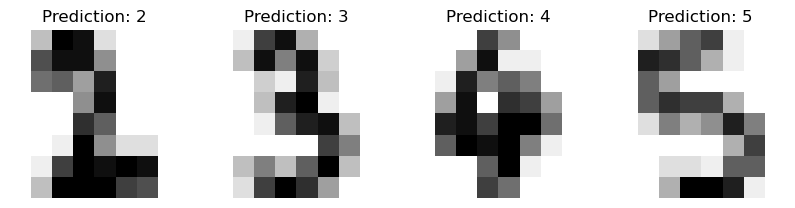

In [11]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [12]:
# Classification report:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test,predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


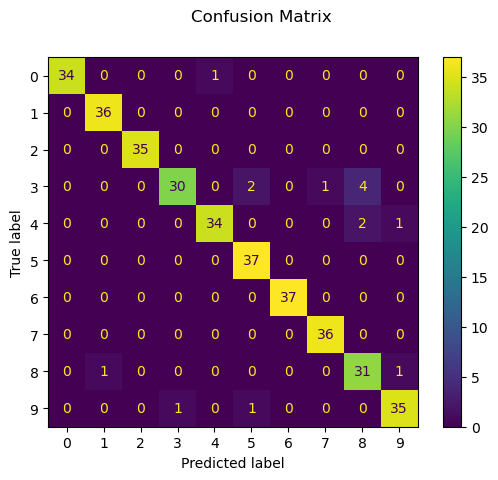

In [13]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [14]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360


